# Unsupervised Learning (Clustering) using cars mpg data set.

In [1]:
# importing all necessary packages
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

In [2]:
# importing the dataset
cars_df = pd.read_csv('cars-dataset.csv')

In [3]:
# reading the dataset
cars_df.head()

,car name,cyl,disp,hp,wt,acc,yr,mpg
0,chevrolet chevelle malibu,8,307.0,130,3504,12.0,70,18.0
1,buick skylark 320,8,350.0,165,3693,11.5,70,15.0
2,plymouth satellite,8,318.0,150,3436,11.0,70,18.0
3,amc rebel sst,8,304.0,150,3433,12.0,70,16.0
4,ford torino,8,302.0,140,3449,10.5,70,17.0


### EDA

In [4]:
# check for null data
cars_df.isnull().any()

car name    False
cyl         False
disp        False
hp          False
wt          False
acc         False
yr          False
mpg         False
dtype: bool

Everything seems fine after doing the null check, let's deep dive into the data to learn more about it.

In [5]:
# overview of the dataset
cars_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 8 columns):
car name    398 non-null object
cyl         398 non-null int64
disp        398 non-null float64
hp          398 non-null object
wt          398 non-null int64
acc         398 non-null float64
yr          398 non-null int64
mpg         398 non-null float64
dtypes: float64(3), int64(3), object(2)
memory usage: 21.8+ KB


'hp' column is currently an object type, which means there is probably some erroneous data there.

In [6]:
# checking for values within hp column for analysis
cars_df.hp.unique()

array(['130', '165', '150', '140', '198', '220', '215', '225', '190',
       '170', '160', '95', '97', '85', '88', '46', '87', '90', '113',
       '200', '210', '193', '?', '100', '105', '175', '153', '180', '110',
       '72', '86', '70', '76', '65', '69', '60', '80', '54', '208', '155',
       '112', '92', '145', '137', '158', '167', '94', '107', '230', '49',
       '75', '91', '122', '67', '83', '78', '52', '61', '93', '148',
       '129', '96', '71', '98', '115', '53', '81', '79', '120', '152',
       '102', '108', '68', '58', '149', '89', '63', '48', '66', '139',
       '103', '125', '133', '138', '135', '142', '77', '62', '132', '84',
       '64', '74', '116', '82'], dtype=object)

In the unique values list for hp column, we can see that few rows have missing data in the form of '?'.
Let's check out how many records have this missing data.

In [7]:
cars_df[cars_df['hp'] == '?']

,car name,cyl,disp,hp,wt,acc,yr,mpg
32,ford pinto,4,98.0,?,2046,19.0,71,25.0
126,ford maverick,6,200.0,?,2875,17.0,74,21.0
330,renault lecar deluxe,4,85.0,?,1835,17.3,80,40.9
336,ford mustang cobra,4,140.0,?,2905,14.3,80,23.6
354,renault 18i,4,100.0,?,2320,15.8,81,34.5
374,amc concord dl,4,151.0,?,3035,20.5,82,23.0


There are 6 records with the missing data in the form of '?'. This is a low number of records, so we can drop these records.

In [8]:
# removing the erroneouus records
cars_df = cars_df[cars_df['hp'] != '?']

In [9]:
# checking for the '?' values again
cars_df[cars_df['hp'] == '?']

,car name,cyl,disp,hp,wt,acc,yr,mpg


In [10]:
# let's check if the column datatype is rectified now
cars_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 392 entries, 0 to 397
Data columns (total 8 columns):
car name    392 non-null object
cyl         392 non-null int64
disp        392 non-null float64
hp          392 non-null object
wt          392 non-null int64
acc         392 non-null float64
yr          392 non-null int64
mpg         392 non-null float64
dtypes: float64(3), int64(3), object(2)
memory usage: 24.5+ KB


In [11]:
# we'll have to convert in hp column the data into numeric values now
cars_df['hp'] = pd.to_numeric(cars_df['hp'])

In [12]:
cars_df.dtypes

car name     object
cyl           int64
disp        float64
hp            int64
wt            int64
acc         float64
yr            int64
mpg         float64
dtype: object

The 'hp' column has now been converted into float and can be considered for numerical analysis.

In [13]:
# statistical overview of the dataset
cars_df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
cyl,392.0,5.471939,1.705783,3.0,4.000,4.00,8.000,8.0
disp,392.0,194.411990,104.644004,68.0,105.000,151.00,275.750,455.0
hp,392.0,104.469388,38.491160,46.0,75.000,93.50,126.000,230.0
wt,392.0,2977.584184,849.402560,1613.0,2225.250,2803.50,3614.750,5140.0
acc,392.0,15.541327,2.758864,8.0,13.775,15.50,17.025,24.8
yr,392.0,75.979592,3.683737,70.0,73.000,76.00,79.000,82.0
mpg,392.0,23.445918,7.805007,9.0,17.000,22.75,29.000,46.6


#### Correlation

Now let's check the correlation of all features in the data w.r.t the target variable i.e. mpg and sort it in ascending order.

In [14]:
cars_df.corr()['mpg'].sort_values()

wt     -0.832244
disp   -0.805127
hp     -0.778427
cyl    -0.777618
acc     0.423329
yr      0.580541
mpg     1.000000
Name: mpg, dtype: float64

Here, we are seing that weight & engine displacement are having strong negative correlation with miles per gallon.  
- Weight having a negative bear on the miles per gallon makes logical sense since a huigh weight car is more likely to use up more fuel for accelaration.  
- Engine displacement is also having a negative correlation with miles per gallon, which is basic arithmetic that higher amount of fuel being shoved off by the pistons in a cylinder would mean higher and faster rate of consumption meaning lower mpg).  

Let's investigate  further with a correlation matrix.

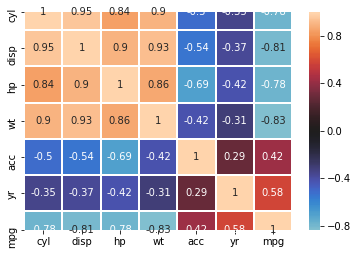

In [15]:
sns.heatmap(data=cars_df.corr(),annot=True,linewidths=1,center=0)

Here we see the following:
- Number of cylinder and engine displacement are highly positively correlated (which is expected since Engine displacement is the combined swept volume of the pistons inside the cylinders of an engine).
- Horsepower (performance of an engine) is highly positively correlated to the engine dsplacement (which makes sense).
- Weight and engine displacement are also positively correlated, but we do not see a causation here. This is an interesting observation.

#### Univariate Analysis

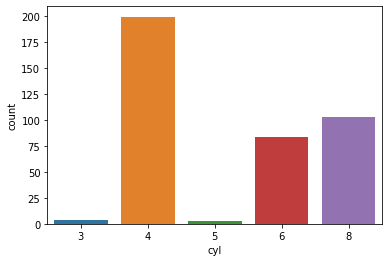

In [16]:
sns.countplot(cars_df['cyl'])

We can see from above that most of the cars are having 4 cylinder engine. Almost 98% of the cars are having 4, 6 or 8 cylinders - so the cars having 3 or 5 cylinder engine are represented in really low numbers.

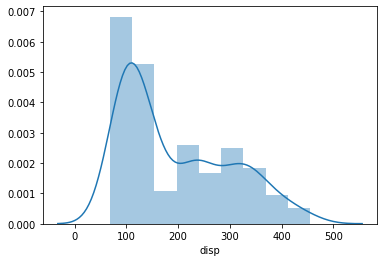

In [17]:
sns.distplot(cars_df['disp'])

We can see that most of the cars have an engine displacement in the lower range of 70 - 150. 

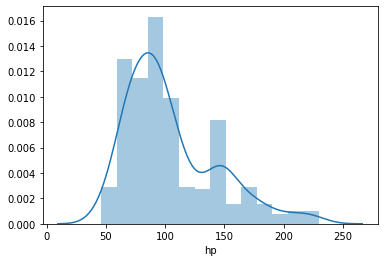

In [18]:
sns.distplot(cars_df['hp'])

We can see a similar kind of distribution for the horsepower of cars that we have for engine displacement. Most of the cars are having a horsepower in the range of 75 - 120.

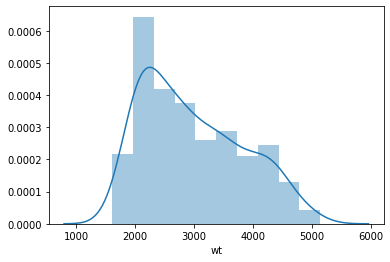

In [19]:
sns.distplot(cars_df['wt'])

We can see that the cars are having most frequency in the loser or average weight category.

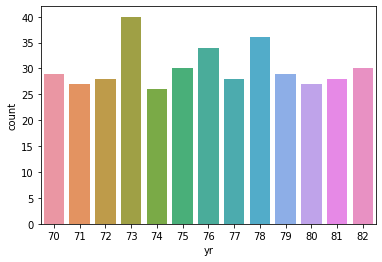

In [20]:
sns.countplot(cars_df['yr'])

Highest number of cars were of the year 1973 and least of the year 1974. Most of the cars lied in the years 1973, 1976 & 1978.

**It is very important to understand that the EDA we've done this far is only to have a better understanding of the data we're dealing with.**

**We have assumed the mpg (miles per gallon) attribute to be a target variable for some of the analysis till now.**

**However, all of that goes out of the window since we are going for unsupervised learning below (there are no predefined classes/labels in unsupervised methods).**

### Unsupervised Learning

For unsupervised learning we cannot use object data type columns, so we'll make car name column as index.

In [21]:
cars_df.set_index('car name',inplace=True)

In [22]:
cars_df.head()

,cyl,disp,hp,wt,acc,yr,mpg
car name,,,,,,,
chevrolet chevelle malibu,8,307.0,130,3504,12.0,70,18.0
buick skylark 320,8,350.0,165,3693,11.5,70,15.0
plymouth satellite,8,318.0,150,3436,11.0,70,18.0
amc rebel sst,8,304.0,150,3433,12.0,70,16.0
ford torino,8,302.0,140,3449,10.5,70,17.0


### K-Means Clustering

In [23]:
from sklearn.cluster import KMeans
# importing the algorithm

In [24]:
# dummy array to store cluster errors
cluster_errors = []

Now let's iterate values of k from 1 to 10 and fit the K Means model. 

In [25]:
for k in range(1,11):
    km1 = KMeans(k,random_state=0)
    km1.fit(cars_df)
    cluster_errors.append(km1.inertia_)

Now, let's plot elbow/scree plot to determine the optimal value of k (number of clusters).

Text(0.5, 1.0, 'Elbow Plot')

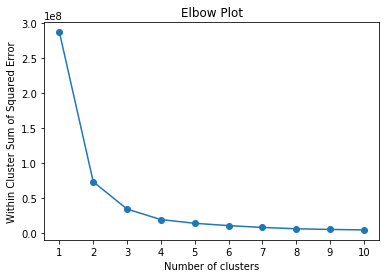

In [26]:
plt.plot(range(1,11),cluster_errors,marker='o')
plt.xticks(range(1,11))
plt.xlabel('Number of clusters')
plt.ylabel('Within Cluster Sum of Squared Error')
plt.title('Elbow Plot')

It is not obvious from the Elbow plot as to what exactly is the optimal value of k. So now, let's try to use silhouette score for finding out optimal k value.

In [27]:
from sklearn.metrics import silhouette_score
# importing silhouette score from metrics to do score analysis

In [28]:
# dummy array to store silhouette scores
sil = []

In [29]:
for k in range(2,11):
    km1 = KMeans(k,random_state=0)
    km1.fit(cars_df)
    labels = km1.labels_
    sil_score = silhouette_score(cars_df,labels,metric='euclidean')
    sil.append(sil_score)

Now let's plot this silhouette score across different number of clusters and see where it is the highest.

Text(0.5, 1.0, 'Silhouette Score v/s K')

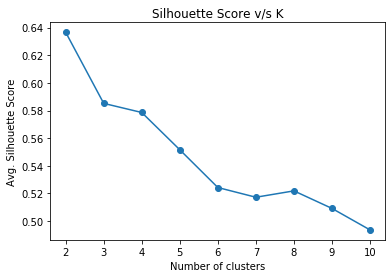

In [30]:
plt.plot(range(2,11),sil,marker='o')
plt.xticks(range(2,11))
plt.xlabel('Number of clusters')
plt.ylabel('Avg. Silhouette Score')
plt.title('Silhouette Score v/s K')

So we have a clear winner here. k = 2 is the optimal value since we have the highest silhouette score there.

Now let's apply the cluster model onto the dataset and cluster based on the labels.

In [31]:
km2 = KMeans(2,random_state=0).fit(cars_df)
cars_df['labels'] = km2.labels_

We will now do the cluster profiling for this model.

In [32]:
profile_df = cars_df
profile_df = profile_df.groupby('labels').mean()
profile_df['freq'] = cars_df.labels.value_counts().sort_index()
profile_df

,cyl,disp,hp,wt,acc,yr,mpg,freq
labels,,,,,,,,
0,7.237179,301.653846,137.564103,3879.532051,14.541667,74.762821,16.453846,156
1,4.305085,123.523305,82.593220,2381.381356,16.202119,76.783898,28.067797,236


#### Conclusion for K-Means cluster profile 

Here, we have divided our original data set into 2 clusters - 1 with low mpg and 1 with high mpg.
Cluster 0 represents the low mpg set of 156 cars which have an average mpg of approx. 16.
Cluster 1 represents the high mpg set of 236 cars which have an average mpg of approx. 28.

### Hierarchical Clustering

In [33]:
from scipy.cluster.hierarchy import linkage, dendrogram
# importing all necessary packages

In [34]:
cars2_df = cars_df.drop('labels',axis=1)
# removing labels from the previous model to feed data into new nodel

In [35]:
linkage_df = linkage(cars2_df,method='ward')
# passed the linkage matrix into a dataframe

Let's plot the dendogram and have a look for the optimal k visually. 

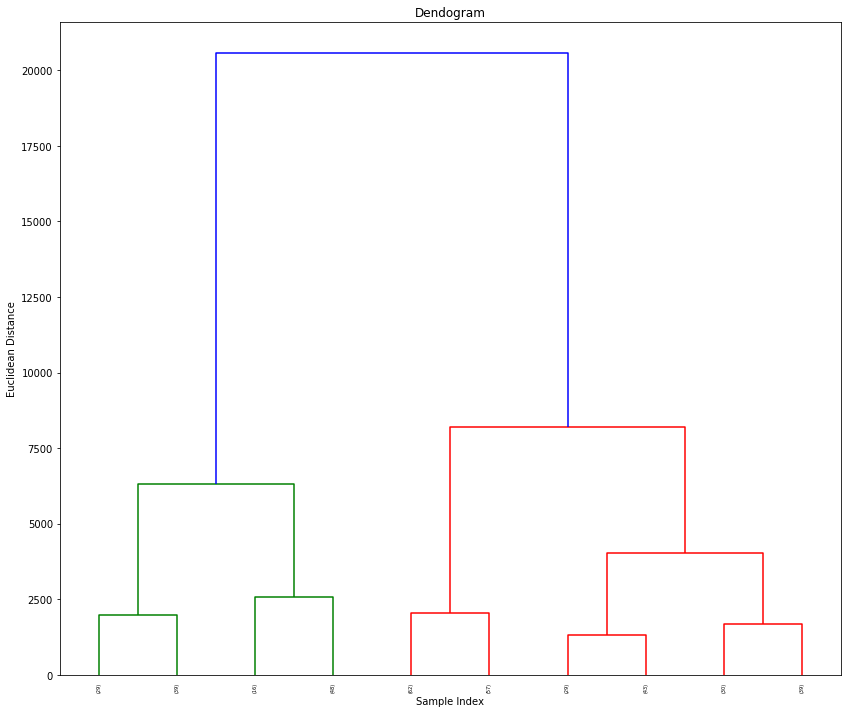

In [36]:
plt.figure(figsize=(14,12))
plt.title('Dendogram')
plt.xlabel('Sample Index')
plt.ylabel('Euclidean Distance')
dendrogram(linkage_df,p=10,truncate_mode='lastp',leaf_rotation=90,leaf_font_size=5)
plt.tight_layout
plt.show()

Visually it is clear that we have a highest vertical distance with no intersection by clusters at k = 2.

Let's try to find the optimal distance between clusters for k =2 mathematically and use that to model our data.

In [37]:
from scipy.cluster.hierarchy import fcluster
req_val = []
for i in range(7500,20000):
    a = len(set(fcluster(linkage_df, t = i, criterion = 'distance')))
    if (a == 2):
        req_val.append(i)
print("The optimal distance between clusters for 2 clusters to be made out of the dataset is:",req_val[0])

The optimal distance between clusters for 2 clusters to be made out of the dataset is: 8211


In [38]:
clusters = fcluster(linkage_df, t = 8211, criterion = 'distance')
# using the optimal dustance found above to label our data into 2 clusters

In [39]:
cars2_df['labels'] = clusters
# appending the cluster labels to our data set

We will now do the cluster profiling for this model.

In [40]:
profile2_df = cars2_df
profile2_df = profile2_df.groupby('labels').mean()
profile2_df['freq'] = cars2_df.labels.value_counts().sort_index()
profile2_df

,cyl,disp,hp,wt,acc,yr,mpg,freq
labels,,,,,,,,
1,7.492424,317.340909,145.113636,3999.992424,14.096970,74.515152,15.754545,132
2,4.446154,132.001923,83.834615,2458.515385,16.274615,76.723077,27.350769,260


#### Conclusion for Heirachical cluster profile 

Here, we have divided our original data set into 2 clusters - 1 with low mpg and 1 with high mpg.
Cluster 1 represents the low mpg set of 132 cars which have an average mpg of approx. 15.
Cluster 2 represents the high mpg set of 260 cars which have an average mpg of approx. 27.